In [1]:
#Importing Libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings #to remove the warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Importing dataset
df=pd.read_csv(r'C:\Users\mahgol\Desktop\machine learning\sport car prediction\Sport car price.csv')
df

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


In [97]:
#Getting informations of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [98]:
#Pre-processing
le = LabelEncoder()

In [99]:
df['Car Make'] = le.fit_transform(df['Car Make'])

In [100]:
df.drop(columns='Car Model',axis=1,inplace=True)

In [101]:
df.head(31)

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,28,2022,3,379,331,4,"101,200"
1,16,2021,5.2,630,443,2.8,"274,390"
2,11,2022,3.9,661,561,3,"333,750"
3,5,2022,5.2,562,406,3.2,"142,700"
4,21,2021,4,710,568,2.7,"298,000"
5,6,2022,4.4,617,553,3.1,"130,000"
6,23,2021,4,523,494,3.8,"118,500"
7,9,2021,6.2,490,465,2.8,"59,900"
8,12,2022,5.2,760,625,3.5,"81,000"
9,24,2021,3.8,600,481,2.5,"212,000"


In [102]:
#Transfering Objective datas to Intiger and float datas
df['Price (in USD)']=df['Price (in USD)'].str.replace(',', '')
df['Price (in USD)']=df['Price (in USD)'].astype(int)

In [103]:
df['Engine Size (L)'] = pd.to_numeric(df['Engine Size (L)'], errors='coerce')
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')
df['Torque (lb-ft)'] = pd.to_numeric(df['Torque (lb-ft)'], errors='coerce')
df['0-60 MPH Time (seconds)'] = pd.to_numeric(df['0-60 MPH Time (seconds)'], errors='coerce')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 1007 non-null   int32  
 1   Year                     1007 non-null   int64  
 2   Engine Size (L)          948 non-null    float64
 3   Horsepower               998 non-null    float64
 4   Torque (lb-ft)           999 non-null    float64
 5   0-60 MPH Time (seconds)  1006 non-null   float64
 6   Price (in USD)           1007 non-null   int32  
dtypes: float64(4), int32(2), int64(1)
memory usage: 47.3 KB


In [105]:
#Filling nonvalues with mean 
df.fillna(df.mean(skipna=True),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 1007 non-null   int32  
 1   Year                     1007 non-null   int64  
 2   Engine Size (L)          1007 non-null   float64
 3   Horsepower               1007 non-null   float64
 4   Torque (lb-ft)           1007 non-null   float64
 5   0-60 MPH Time (seconds)  1007 non-null   float64
 6   Price (in USD)           1007 non-null   int32  
dtypes: float64(4), int32(2), int64(1)
memory usage: 47.3 KB


In [106]:
 #Define dependent and independent variables 
X = df.drop(columns='Price (in USD)',axis=1)
y=df['Price (in USD)']

In [107]:
#split the data into a training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
#Define_Model
#Fit a linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [109]:
##Apply the model on the test data and make a prediction
y_pred = model.predict(X_test)

In [110]:
#chek the Model score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.5832625412138263


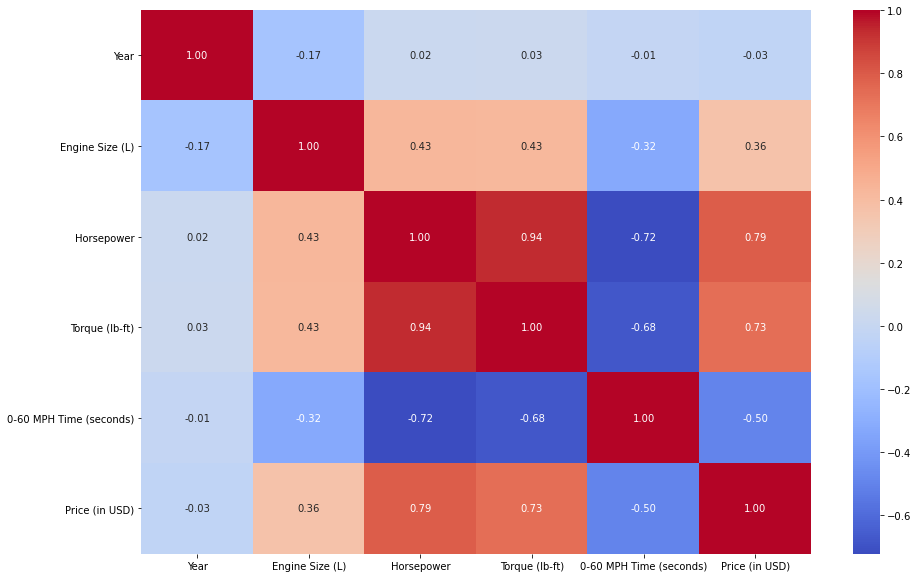

In [111]:
#check correlaion
plt.figure(figsize=(15,10))
sns.heatmap(data=df.iloc[:,1:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [112]:
corr_rank = df.corr()
corr_rank["Price (in USD)"].sort_values(ascending=False)

Price (in USD)             1.000000
Horsepower                 0.792547
Torque (lb-ft)             0.731392
Engine Size (L)            0.364107
Car Make                   0.077272
Year                      -0.031419
0-60 MPH Time (seconds)   -0.498487
Name: Price (in USD), dtype: float64

In [89]:
# drop all columns that are lowest correlation 
df=df.drop(['Engine Size (L)','Car Make','Year','0-60 MPH Time (seconds)','Torque (lb-ft)'],axis=1)

In [57]:
#just use column of Horsepower (highest correlation)
df.sort_values(by='Horsepower')

,Horsepower,Price (in USD)
92,181.0,26830
536,237.0,68745
478,237.0,67150
236,237.0,67150
819,237.0,69000
...,...,...
1003,1972.0,2000000
420,1973.0,2750000
987,1973.0,2000000
523,1973.0,2600000


In [58]:
#Define new dependent and independent variables 
X=df.loc[:,(df.columns !='Price (in USD')]
y=df['Price (in USD)']

In [59]:
#split the data into a training set and testing set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
#Define a model
#Fit a linear regression
model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

In [61]:
#Apply the model on the test data and make a prediction
#chek the Model score
ypred = model.predict(Xtest)
r2 = r2_score(ytest, ypred)
print(f"R2_score: {r2}")

R2_score: 1.0


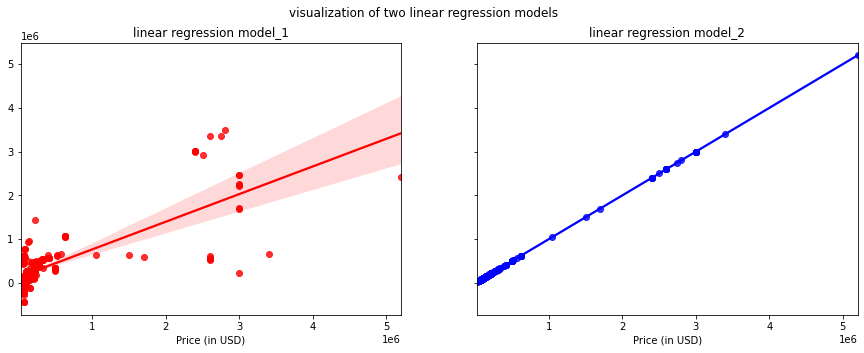

In [69]:
# Display the visualization of linear regression models  
fig, axes = plt.subplots(1, 2, figsize=(15,5),sharey=True)
fig.suptitle('visualization of two linear regression models ')
sns.regplot(ax=axes[0],x=y_test,y=y_pred,color ='r')
axes[0].set_title('linear regression model_1')
sns.regplot(ax=axes[1],x=ytest,y=ypred,color ='b')
axes[1].set_title('linear regression model_2')

In [32]:
#showing comprsion between Acual values & Predicted values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df.head(20)

,Actual Value,Predicted Value,Difference
927,75250,1.283809e+05,-5.313086e+04
630,201000,3.977561e+05,-1.967561e+05
682,310000,5.296192e+05,-2.196192e+05
514,220000,1.448159e+06,-1.228159e+06
365,71500,-2.724620e+05,3.439620e+05
655,69995,6.032864e+05,-5.332914e+05
656,305000,5.296192e+05,-2.246192e+05
529,325000,5.177270e+05,-1.927270e+05
321,201495,1.651154e+05,3.637961e+04
70,150980,2.112186e+05,-6.023861e+04
